In [1]:
# !pip install python-binance
import os
from interact_with_binance import fetch_ohlcv, fetch_ohlcv_as_df
from market_candles import MarketCandle
from binance.client import Client
from convert_ts_to_datetime import convert_ts_to_datetime


api_key = os.environ.get('BINANCE_API_KEY')
api_secret = os.environ.get('BINANCE_API_SECRET')
client = Client(api_key, api_secret)

# Récupère les données de marché en *temps différé* sur Binance
interval_value = Client.KLINE_INTERVAL_1HOUR
from_date = "3 avril 2024"

historical_candles = fetch_ohlcv(client, symbol = "BTCUSDT", interval=interval_value, from_date=from_date) #"1 Jan, 2015"
historical_candles_df = fetch_ohlcv_as_df(client, symbol = "BTCUSDT", interval=interval_value, from_date=from_date) #"1 Jan, 2015"
historical_candles_df[0:5]

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2024-04-03 00:00:00,65463.99,65610.00,64493.07,65387.99,4115.32826,2024-04-03 00:59:59.999,2.680072e+08,139236,1875.25183,1.221588e+08,0.0
2024-04-03 01:00:00,65388.00,65930.51,65090.00,65792.43,2368.51560,2024-04-03 01:59:59.999,1.550170e+08,104364,1151.14422,7.535924e+07,0.0
2024-04-03 02:00:00,65792.42,66052.00,65683.74,65906.49,1601.22687,2024-04-03 02:59:59.999,1.054656e+08,84772,840.19974,5.534558e+07,0.0
2024-04-03 03:00:00,65906.49,66288.88,65764.00,66225.79,1266.05890,2024-04-03 03:59:59.999,8.354729e+07,69226,743.92623,4.909171e+07,0.0
2024-04-03 04:00:00,66225.79,66478.59,66120.00,66320.41,1350.05763,2024-04-03 04:59:59.999,8.949617e+07,68930,747.83740,4.957627e+07,0.0


In [2]:
import plotly.graph_objects as go

# Tracer les bougies avec Plotly
fig = go.Figure(data=[go.Candlestick(x=historical_candles_df.index,
                open=historical_candles_df['open'],
                high=historical_candles_df['high'],
                low=historical_candles_df['low'],
                close=historical_candles_df['close'])])
fig.update_layout(title='Bougies BTCUSDT',
                  xaxis_title='Date',
                  yaxis_title='Prix',
                  height=1000)  # Ajustez la hauteur ici selon vos besoins
fig.show()

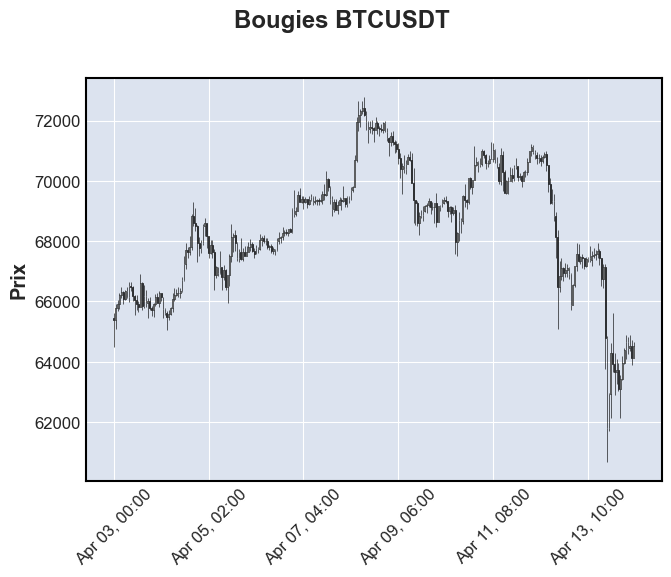

In [3]:
import mplfinance as mpf
import pandas as pd

# Tracer les bougies avec mplfinance
mpf.plot(historical_candles_df, type='candle', title='Bougies BTCUSDT', ylabel='Prix')

In [6]:
# !pip install bokeh
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import output_notebook

def plot_candlestick(historical_candles_df):
    # Créer une source de données Bokeh
    source = ColumnDataSource(data=historical_candles_df)

    # Créer le graphique Bokeh
    p = figure(x_axis_type='datetime', title='Bougies BTCUSDT', width=1000, height=500)
    p.segment(x0='timestamp', y0='high', x1='timestamp', y1='low', color='black', source=source)
    p.vbar(x='timestamp', width=0.5, top='open', bottom='close', fill_color='green', line_color='black', source=source)
    p.xaxis.axis_label = 'Date'
    p.yaxis.axis_label = 'Prix'

    # Afficher le graphique dans le notebook
    output_notebook()
    show(p)


plot_candlestick(historical_candles_df)

Loading BokehJS ...

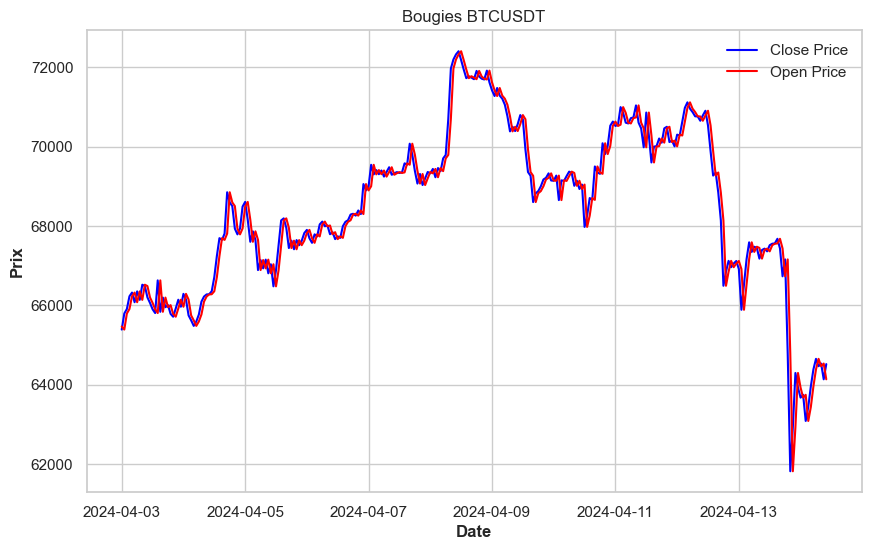

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style seaborn
sns.set(style="whitegrid")

# Tracer les bougies avec Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(historical_candles_df.index, historical_candles_df['close'], color='blue', label='Close Price')
plt.plot(historical_candles_df.index, historical_candles_df['open'], color='red', label='Open Price')

# Ajouter des détails au graphique
plt.title('Bougies BTCUSDT')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()

# Afficher le graphique
plt.show()
